# Inversion Sampling

To generate uniform samples from given *R*, we need to use inversion sampling.

\begin{array}{@{} r @{} c @{} l @{} }
&R \sim p(r) &{}=\displaystyle
\begin{cases}
2r & 0 \le r \le 1\\
0 &otherwise
\end{cases}
\end{array}

Our Probability Density Function is written above and we need to obtain Cumulative Distribution Function. The CDF is found as

$$F(r) = \int_{0}^{r} 2x dx = r^{2}$$

The generalised inverse is obtained via

$$u = F(r) = r^{2}\\
r = \sqrt{u}$$

Now we can generate *u* uniformly on \[0, 1\] and find the corresponding \(x\) via the generalised inverse $F^{-}(u)$. $\theta$ is already uniformly distributed between $[0, 2\pi]$, therefore we don’t need to use inversion. We only need to generate a random number between 0 and 1 and multiply it by $2\pi$.

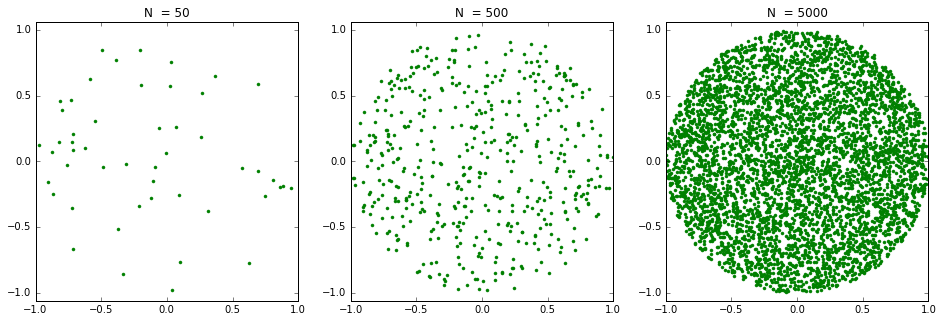

In [147]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

points = []
n = 5000

for i in range(n):
    r = np.sqrt(np.random.rand())
    theta = 2 * np.random.rand() * np.pi
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    points.append((x,y))
    
x = [i[0] for i in points]
y = [i[1] for i in points]
    
f, subplot = plt.subplots(1,3, figsize=(16,5))
    
for i in range(3):
    lmt = int(n / np.power(10, 2-i))
    subplot[i].plot(x[:lmt], y[:lmt], '.g')
    subplot[i].axis('equal')
    subplot[i].set_title('N  = ' + str(lmt))

# Rejection Sampling

For rejection sampling, we can use uniform samples from a circular region as a *proposal* distribution. We already generated those distribution in the previous section, so we can use those results in rejection sampling. Efficiency can be found via dividing number of accepted samples by number of total samples.

## Closed unit ball for *p* = 1.5

(-1.5, 1.5, -1.5, 1.5)

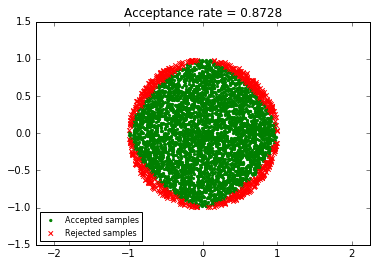

In [148]:
accepted_15 = []
rejected_15 = []

def accept_reject(x, y, p):
    return np.power((np.power(np.absolute(x),p) + np.power(np.absolute(y),p)), (1/p)) <= 1

for i in range(n):
    if (accept_reject(x[i], y[i], 1.5)):
        accepted_15.append(points[i])
    else:
        rejected_15.append(points[i])

pos = plt.scatter(*zip(*accepted_15), color = 'g', marker = '.')
neg = plt.scatter(*zip(*rejected_15), color = 'r', marker = 'x')
plt.title('Acceptance rate = ' + str(len(accepted_15)/float(n)))
plt.legend((pos, neg),
           ('Accepted samples', 'Rejected samples'),
          scatterpoints = 1,
          loc = 'lower left',
          fontsize = 8)
plt.axis('equal')

## Closed unit ball for *p* = 0.7

(-1.5, 1.5, -1.5, 1.5)

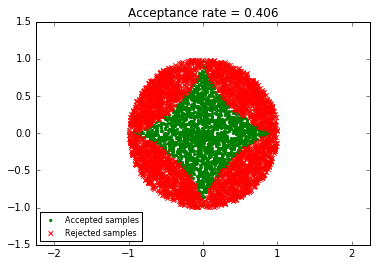

In [149]:
accepted_07 = []
rejected_07 = []

def accept_reject(x, y, p):
    return np.power((np.power(np.absolute(x),p) + np.power(np.absolute(y),p)), (1/p)) <= 1

for i in range(n):
    if (accept_reject(x[i], y[i], 0.7)):
        accepted_07.append(points[i])
    else:
        rejected_07.append(points[i])

pos = plt.scatter(*zip(*accepted_07), color = 'g', marker = '.', label = 'accepted samples')
neg = plt.scatter(*zip(*rejected_07), color = 'r', marker = 'x')
plt.title('Acceptance rate = ' + str(len(accepted_07)/float(n)))
plt.legend((pos, neg),
           ('Accepted samples', 'Rejected samples'),
          scatterpoints = 1,
          loc = 'lower left',
          fontsize = 8)
plt.axis('equal')

## Closed unit ball for *p* = 0.7 with better efficiency

What we can do to have better efficiency for *p* = 0.7 is having a better proposal.

For *p*-norms, when $p < 1$, the *superellipse* becomes more and more concave and vica versa, when *p* goes from 1 to infinity, the superellipse grows outward to have a more convex shape. In our case, since the *p*-norm is smaller than 1, it is concave. Instead of using a unit circle as our proposal, we can find a better shape. That shape can be a *p*-norm shape with *p* = 1. The plot below is the graphical representation of *p* = 1.

(-1.5, 1.5, -1.5, 1.5)

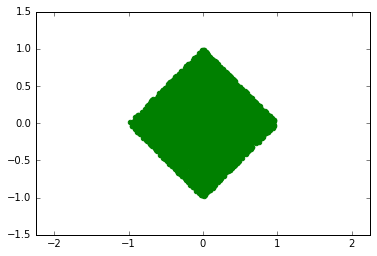

In [150]:
sample_points = []

for i in range(n):
    x = np.sqrt(2) * (np.random.rand() - 0.5)
    y = np.sqrt(2) * (np.random.rand() - 0.5)
    
    rotMatrix = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)], 
                   [np.sin(np.pi/4),  np.cos(np.pi/4)]])
    
    vector = np.array([x, y])
    vector = rotMatrix.dot(vector)
    sample_points.append(vector)
    
plt.scatter(*zip(*sample_points), color = 'g', marker = 'o')
plt.axis('equal')

It is clear that this shape would be a better proposal than a unit circle. Of course, we need to prove it. We will generate *n* sample points that is within *1*-norm, and use our acceptance-rejection comparison to sample points for *0.7*-norm.

We can easily see that this *1*-norm shape is special, it is a square centered on origin, but it is rotated $\frac{\pi}{4}$ degrees and its diagonal distance is 2. In other words, it a square with side $a = \sqrt{2}$ and it is rotated $\frac{\pi}{4}$ degrees.

Now that we have our sample points, we can use rejection sampling to get a better efficiency for *p* = 0.7.

(-1.5, 1.5, -1.5, 1.5)

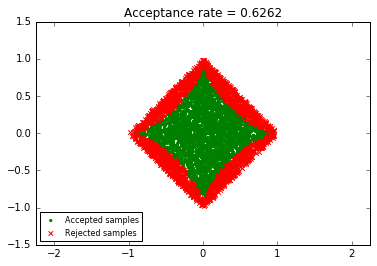

In [151]:
accepted = []
rejected = []

for point in sample_points:
    if (accept_reject(point[0], point[1], 0.7)):
        accepted.append(point)
    else:
        rejected.append(point)
        
pos = plt.scatter(*zip(*accepted), color = 'g', marker = '.', label = 'accepted samples')
neg = plt.scatter(*zip(*rejected), color = 'r', marker = 'x')
plt.title('Acceptance rate = ' + str(len(accepted)/float(n)))
plt.legend((pos, neg),
           ('Accepted samples', 'Rejected samples'),
          scatterpoints = 1,
          loc = 'lower left',
          fontsize = 8)
plt.axis('equal')

We see that our acceptance rate has increased to around ~0.63 from ~0.41. Thus we can say that our approach to increase efficiency works.